In [7]:
from google.colab import drive
drive.mount('/content/drive')

import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# -------------------------------------------------------
# 1. Set Dataset Path
# -------------------------------------------------------
dataset_path = "/content/drive/MyDrive/deep_learning/fashion_small/images"

print("Reading images from:", dataset_path)

# Load all JPG and PNG images
valid_images = sorted(
    glob.glob(os.path.join(dataset_path, "*.jpg")) +
    glob.glob(os.path.join(dataset_path, "*.png"))
)

print("Total images found:", len(valid_images))

# Safety check
if len(valid_images) == 0:
    raise Exception("❌ No images found! Check folder path or file types.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading images from: /content/drive/MyDrive/deep_learning/fashion_small/images
Total images found: 44441


Using image: /content/drive/MyDrive/deep_learning/fashion_small/images/1813.jpg
Image shape: (80, 60, 3)


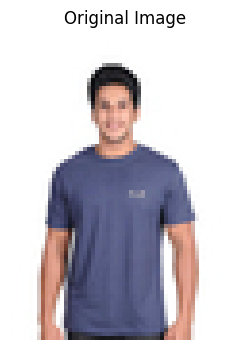

In [30]:
# -------------------------------------------------------
# 2. Pick an image by index
# -------------------------------------------------------
idx = 6969  # change this to any valid number

img_path = valid_images[idx]
print("Using image:", img_path)

# Load image as RGB (NOT gray)
img = Image.open(img_path).convert("RGB")
img_np = np.array(img)

print("Image shape:", img_np.shape)

# -------------------------------------------------------
# 3. Display Original Image
# -------------------------------------------------------
plt.figure(figsize=(4,4))
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")
plt.show()


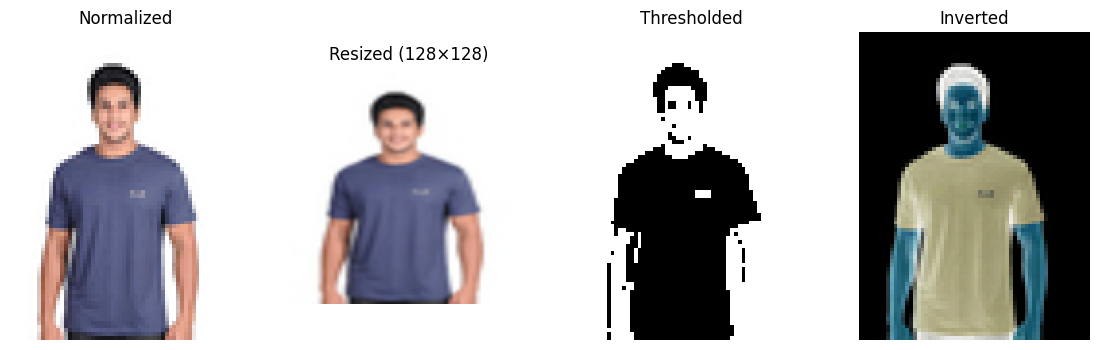

In [31]:
# -------------------------------------------------------
# 4. Preprocessing Operations
# -------------------------------------------------------

# Convert to float (0–1)
img_norm = img_np.astype("float32") / 255.0

# Resize to 128×128
img_resized = tf.image.resize(img_norm, (128, 128)).numpy()

# Threshold (binary mask)
gray_for_thresh = np.mean(img_norm, axis=2)        # convert to grayscale manually
img_thresh = (gray_for_thresh > 0.5).astype(float)

# Invert colors
img_invert = 1 - img_norm

# -------------------------------------------------------
# 5. Display all versions
# -------------------------------------------------------
plt.figure(figsize=(14,4))

plt.subplot(1,4,1)
plt.imshow(img_norm)
plt.title("Normalized")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(img_resized)
plt.title("Resized (128×128)")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(img_thresh, cmap="gray")
plt.title("Thresholded")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(img_invert)
plt.title("Inverted")
plt.axis("off")

plt.show()
